In [1]:
%matplotlib inline

# Model Evaluation
based on original documentation
http://scikit-learn.org/stable/modules/model_evaluation.html

## The scoring parameter

In [2]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
import seaborn as sns
from sklearn import datasets, metrics, model_selection, multiclass, preprocessing, svm

plt.rc('font', family='DejaVu Sans') 

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

failed_list = []
clf = svm.SVC(probability=True, random_state=0)
clf = clf.fit(X, y)
for scoring_type, scoring_function in metrics.SCORERS.items():
    try:
        print('{} =\t\t{}'.format(scoring_type, scoring_function(clf, X, y)))
    except Exception as er:
        print('\t', 'Error of {}:'.format(scoring_type))
        print('\t', er)
        failed_list.append(scoring_type)
    
print('failed_list: [{}]'.format(','.join(failed_list)))

r2 =		0.98
neg_median_absolute_error =		-0.0
neg_mean_absolute_error =		-0.013333333333333334
neg_mean_squared_error =		-0.013333333333333334
neg_mean_squared_log_error =		-0.0021920260519088736
median_absolute_error =		-0.0
mean_absolute_error =		-0.013333333333333334
mean_squared_error =		-0.013333333333333334
accuracy =		0.9866666666666667
	 Error of roc_auc:
	 multiclass format is not supported
	 Error of average_precision:
	 multiclass format is not supported
log_loss =		-0.07850721754027946
neg_log_loss =		-0.07850721754027946
adjusted_rand_score =		0.9602776916338867
homogeneity_score =		0.9485579591566112
completeness_score =		0.9490187936291928
v_measure_score =		0.9487883204351099
mutual_info_score =		1.0420974304433959
adjusted_mutual_info_score =		0.947914156856343
normalized_mutual_info_score =		0.9487883484140054
fowlkes_mallows_score =		0.9733479818942355
	 Error of precision:
	 Target is multiclass but average='binary'. Please choose another average setting.
precision_m

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:99: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:136: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


## Receiver Operating Characteristic (ROC)
based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [4]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = preprocessing.label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.5,
                                                                    random_state=0)

# Learn to predict each class against the other
classifier = multiclass.OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                                    random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

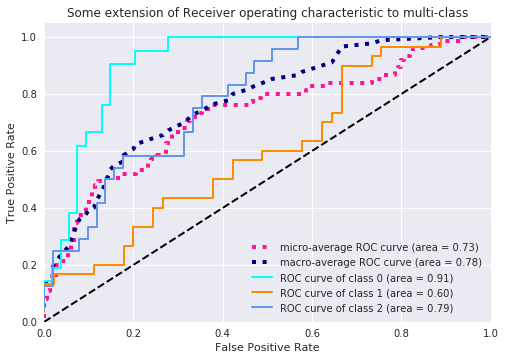

In [5]:
lw = 2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Probability Density Functions (PDF) (The New Thing)

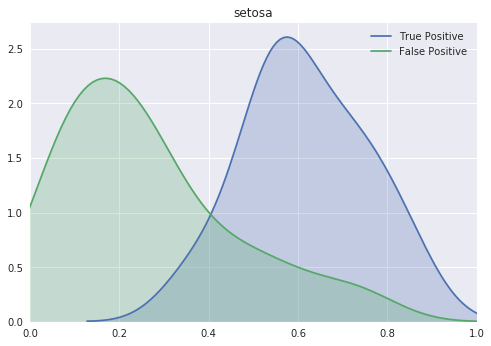

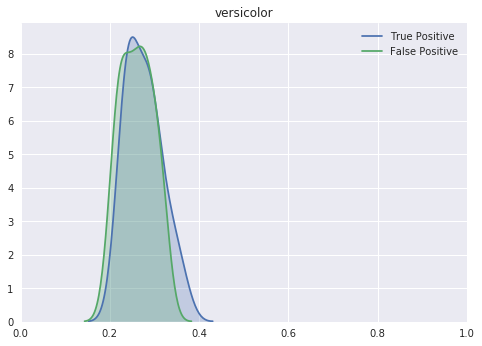

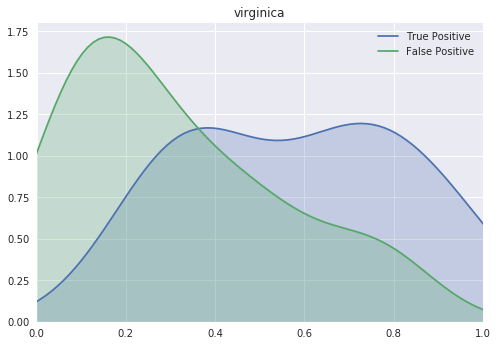

In [6]:
def probability_density_functions(target_feature, classifier, X_test, y_test):
    probability_of_feature = classifier.predict_proba(X_test)[:, target_feature]
    true_feature = np.argmax(y_test, axis=1)
    positive = np.c_[probability_of_feature, true_feature]
    false_positive = positive[positive[:,1] != target_feature][:,0]
    true_positive = positive[positive[:,1] == target_feature][:,0]
    return false_positive, true_positive

def plot_probability_density_functions(title, tp, fp):
    plt.figure()
    sns.kdeplot(tp, shade=True, label='True Positive')
    sns.kdeplot(fp, shade=True, label='False Positive')
    plt.ylim(ymin=0)
    plt.xlim(0, 1)
    plt.title(title)

for feature_idx, feature_name in enumerate(iris.target_names):
    fpr, tpr = probability_density_functions(feature_idx, classifier, X_test, y_test)
    plot_probability_density_functions(feature_name, tpr, fpr)


## Receiver Operating Characteristic (ROC) with cross validation
based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

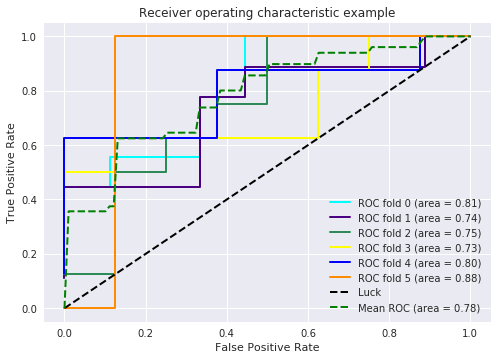

In [7]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Run classifier with cross-validation and plot ROC curves
cv = model_selection.StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Species distribution modeling
based on http://scikit-learn.org/stable/auto_examples/applications/plot_species_distribution_modeling.html

________________________________________________________________________________
Modeling distribution of species 'bradypus variegatus'
 - fit OneClassSVM ... done.
 - plot coastlines using basemap
 - predict species distribution

 Area under the ROC curve : 0.868443
________________________________________________________________________________
Modeling distribution of species 'microryzomys minutus'
 - fit OneClassSVM ... done.
 - plot coastlines using basemap
 - predict species distribution

 Area under the ROC curve : 0.993919

time elapsed: 7.23s


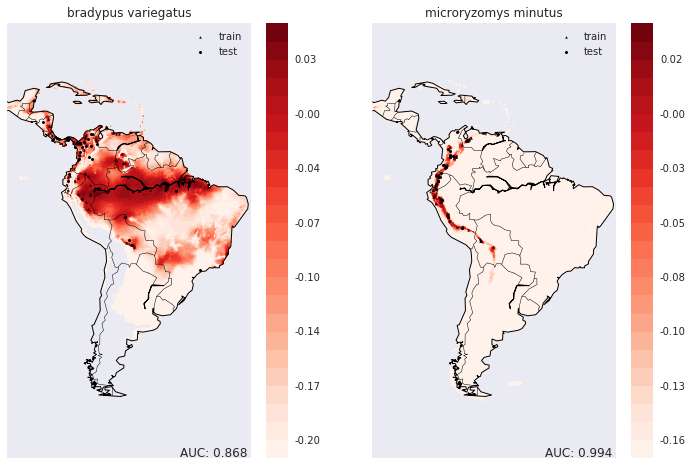

In [8]:
# Authors: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#          Jake Vanderplas <vanderplas@astro.washington.edu>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from time import time


# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False


def create_species_bunch(species_name, train, test, coverages, xgrid, ygrid):
    """Create a bunch with information about a particular organism

    This will use the test/train record arrays to extract the
    data specific to the given species name.
    """
    bunch = datasets.base.Bunch(name=' '.join(species_name.split("_")[:2]))
    species_name = species_name.encode('ascii')
    points = dict(test=test, train=train)

    for label, pts in points.items():
        # choose points associated with the desired species
        pts = pts[pts['species'] == species_name]
        bunch['pts_{}'.format(label)] = pts

        # determine coverage values for each of the training & testing points
        ix = np.searchsorted(xgrid, pts['dd long'])
        iy = np.searchsorted(ygrid, pts['dd lat'])
        bunch['cov_{}'.format(label)] = coverages[:, -iy, ix].T

    return bunch


def plot_species_distribution(species=("bradypus_variegatus_0",
                                       "microryzomys_minutus_0")):
    """
    Plot the species distribution.
    """
    if len(species) > 2:
        print("Note: when more than two species are provided,"
              " only the first two will be used")

    t0 = time()

    # Load the compressed data
    data = datasets.fetch_species_distributions()

    # Set up the data grid
    xgrid, ygrid = datasets.species_distributions.construct_grids(data)

    # The grid in x,y coordinates
    X, Y = np.meshgrid(xgrid, ygrid[::-1])

    # create a bunch for each species
    BV_bunch = create_species_bunch(species[0],
                                    data.train, data.test,
                                    data.coverages, xgrid, ygrid)
    MM_bunch = create_species_bunch(species[1],
                                    data.train, data.test,
                                    data.coverages, xgrid, ygrid)

    # background points (grid coordinates) for evaluation
    np.random.seed(13)
    background_points = np.c_[np.random.randint(low=0, high=data.Ny,
                                                size=10000),
                              np.random.randint(low=0, high=data.Nx,
                                                size=10000)].T

    # We'll make use of the fact that coverages[6] has measurements at all
    # land points.  This will help us decide between land and water.
    land_reference = data.coverages[6]

    # Fit, predict, and plot for each species.
    for i, species in enumerate([BV_bunch, MM_bunch]):
        print("_" * 80)
        print("Modeling distribution of species '%s'" % species.name)

        # Standardize features
        mean = species.cov_train.mean(axis=0)
        std = species.cov_train.std(axis=0)
        cov_train_std = (species.cov_train - mean) / std

        # Fit OneClassSVM
        print(" - fit OneClassSVM ... ", end='')
        clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.5)
        clf.fit(cov_train_std)
        print("done.")

        # Plot map of South America
        plt.subplot(1, 2, i + 1)
        if basemap:
            print(" - plot coastlines using basemap")
            m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                        urcrnrlat=Y.max(), llcrnrlon=X.min(),
                        urcrnrlon=X.max(), resolution='c')
            m.drawcoastlines()
            m.drawcountries()
        else:
            print(" - plot coastlines from coverage")
            plt.contour(X, Y, land_reference,
                        levels=[-9999], colors="k",
                        linestyles="solid")
            plt.xticks([])
            plt.yticks([])

        print(" - predict species distribution")

        # Predict species distribution using the training data
        Z = np.ones((data.Ny, data.Nx), dtype=np.float64)

        # We'll predict only for the land points.
        idx = np.where(land_reference > -9999)
        coverages_land = data.coverages[:, idx[0], idx[1]].T

        pred = clf.decision_function((coverages_land - mean) / std)[:, 0]
        # because all cells equal to 1 it just assign pred.min to every cell
        Z *= pred.min()
        Z[idx[0], idx[1]] = pred

        levels = np.linspace(Z.min(), Z.max(), 25)
        Z[land_reference == -9999] = -9999

        # plot contours of the prediction
        plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)
        plt.colorbar(format='%.2f')

        # scatter training/testing points
        plt.scatter(species.pts_train['dd long'], species.pts_train['dd lat'],
                    s=2 ** 2, c='black',
                    marker='^', label='train')
        plt.scatter(species.pts_test['dd long'], species.pts_test['dd lat'],
                    s=2 ** 2, c='black',
                    marker='x', label='test')
        plt.legend()
        plt.title(species.name)
        plt.axis('equal')

        # Compute AUC with regards to background points
        pred_background = Z[background_points[0], background_points[1]]
        pred_test = clf.decision_function((species.cov_test - mean)
                                          / std)[:, 0]
        scores = np.r_[pred_test, pred_background]
        y = np.r_[np.ones(pred_test.shape), np.zeros(pred_background.shape)]
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        roc_auc = metrics.auc(fpr, tpr)
        plt.text(-35, -70, "AUC: %.3f" % roc_auc, ha="right")
        print("\n Area under the ROC curve : %f" % roc_auc)

    print("\ntime elapsed: %.2fs" % (time() - t0))


plt.figure(figsize=(12,8))
plot_species_distribution()
plt.show()

## Draw environmental datasets
Based on research http://rob.schapire.net/papers/ecolmod.pdf
Maxent software for modeling species niches and distributions http://biodiversityinformatics.amnh.org/open_source/maxent/ 

### More about features (from original article)
> 2.4.2. Environmental variables
We examine the species’ potential distributions in
the Neotropics from southeastern Mexico to Argentina
(23.55◦ N – 56.05◦ S, 94.8◦ W – 34.2◦ W), including
the Caribbean from Cuba southward. The environmental
variables fall into three categories: climate, elevation
and potential vegetation. All variables are recorded at
a pixel size of 0.05◦ by 0.05◦, yielding a 1212 × 1592
grid, with 648,658 pixels containing data for all variables.

> The climatic variables derive from data provided
by the Intergovernmental Panel on Climate Change
(IPCC; New et al., 1999). The original variables have
a resolution of 0.5◦ by 0.5◦, and were produced using
thin-plate spline interpolation based on readings
taken at weather stations around the world from 1961
to 1990. They describe mean monthly values of various
variables, which we processed to convert to ascii raster
grid format, as required by GARP and Maxent. From
these monthly data, we also created annual variables
by averaging or taking the minimum or maximum as
appropriate.

> Of the many monthly and annual variables available,
we selected the following twelve, based on our
assessment that they would likely have relevance for the
species being modeled (see also Peterson and Cohoon,
1999): *annual cloud cover; annual diurnal temperature
range; annual frost frequency; annual vapor pressure;
January, April, July, October and annual precipitation;
and minimum, maximum and mean annual temperature.*
We used bilinear interpolation to resample to a
pixel size of 0.05◦ by 0.05◦. Although this resampling
clearly does not actually increase the resolution of the
data, bilinear interpolation is likely more realistic than
simply using nearest-neighbor interpolation.

> Two other variables were used in addition to the
climatic data. *An elevation variable* was derived from
USGS HYDRO1k data (USGS, 2001) by resampling
from the original finer resolution (1 km pixels) to 0.05◦
by 0.05◦. Finally, we used a potential vegetation variable,
consisting of a partition of Latin America and the
Caribbean into “major habitat types”, produced as part
of a terrestrial conservation assessment (Dinerstein
et al., 1995). This variable does not take into account
historical (contingent) biogeographic information
or human-induced changes, and represents a reconstruction
of original vegetation types in the region.
We used digital data on 15 major habitat types in a
vector coverage (shape file), which we converted to
a grid with resolution of 0.05◦ by 0.05◦ coincident
with the climatic and elevational variables. The digital
data differed slightly from the description and map
in Dinerstein et al. (1995) by having 15 rather than
11 major habitat types. The differences arise from
the addition of a snow/ice/glaciers/rock category,
a tundra category and a water category; deletion
of the restingas category; splitting of grassland
savannas and shrublands into temperate versus tropical/subtropical
categories; and splitting of temperate
forests into temperate coniferous and temperate
broadleaf and mixed forests. The processed climatic
variables (at the original resolution), all resampled
variables, and the occurrence localities are available
at http://www.cs.princeton.edu/∼schapire/maxent.

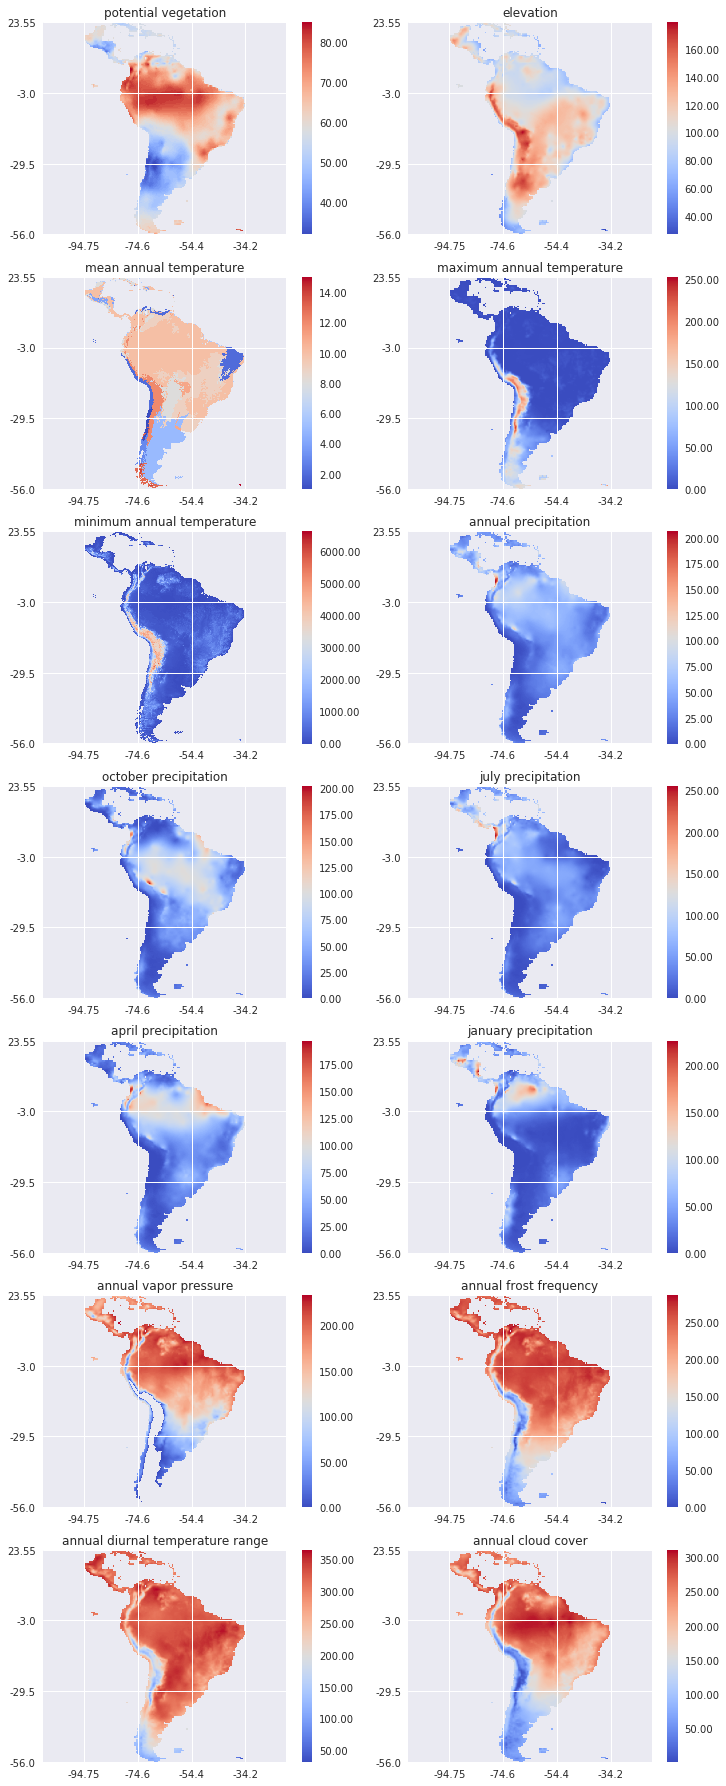

In [9]:
# FIXIT: it seems that features noted in different sequence than in dataset
feature_names = [
    'annual cloud cover',
    'annual diurnal temperature range',
    'annual frost frequency',
    'annual vapor pressure',
    'january precipitation', 
    'april precipitation', 
    'july precipitation', 
    'october precipitation',
    'annual precipitation',
    'minimum annual temperature',
    'maximum annual temperature',
    'mean annual temperature',
    'elevation',
    'potential vegetation',
]

data = datasets.fetch_species_distributions()
xgrid, ygrid = datasets.species_distributions.construct_grids(data)

# for contour
#xx, yy = np.meshgrid(xgrid, -ygrid)

xsteps = 4
ysteps = 4
    
xspace = np.linspace(0, xgrid.shape[0] - 1, xsteps, dtype=int)
yspace = np.linspace(0, ygrid.shape[0] - 1, ysteps, dtype=int)

plt.figure(figsize=(12,32))

for idx, c in enumerate(data.coverages):
    # exclude undefined (-9999) values
    # np.nan is float, and numpyt couldn't use float and int in the same array
    z = c.astype(float)
    z[z < 0] = np.nan
    plt.subplot(7, 2, idx + 1)
    #plt.figure(figsize=(4,4))
#     plt.contour(xx, yy, z)
    plt.imshow(z, cmap='coolwarm')

    # FIXIT: axes should be more geographic - have 0, and less frequent value
    plt.xticks(xspace, xgrid.take(xspace))    
    plt.yticks(yspace, ygrid.take(yspace)[::-1])

    plt.title(feature_names[::-1][idx])
    plt.colorbar(format='%.2f')
    plt.axis('equal')